In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

print('Setup Complete!')

Setup Complete!


In [3]:
df= pd.read_csv('E:\Git Uploads\Algerian-Forest-Fire-ML\Algerian_forest_fire_clean_data.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [9]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [10]:
## Encoding

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [11]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [12]:
## Independent and Dependent features

X = df.drop('FWI', axis=1)
y = df.FWI

In [16]:
## Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3,
                                                    random_state=0)

In [17]:
X_train.shape, X_test.shape

((170, 11), (73, 11))

In [19]:
## Feature Selection based on Correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.648796,-0.371569,-0.385372,0.694424,0.482990,0.357463,0.612692,0.452138,0.510950,0.278815
RH,-0.648796,1.000000,0.285956,0.273055,-0.633706,-0.369544,-0.171307,-0.693044,-0.305489,-0.420613,-0.416846
Ws,-0.371569,0.285956,1.000000,0.222486,-0.246870,-0.034953,0.052273,-0.046837,-0.003317,-0.120151,-0.206495
Rain,-0.385372,0.273055,0.222486,1.000000,-0.605662,-0.298163,-0.302974,-0.345439,-0.307449,-0.386459,-0.105662
FFMC,0.694424,-0.633706,-0.246870,-0.605662,1.000000,0.619730,0.524332,0.738829,0.605299,0.767044,0.259048
DMC,0.482990,-0.369544,-0.034953,-0.298163,0.619730,1.000000,0.877536,0.676000,0.983532,0.624942,0.176704
DC,0.357463,-0.171307,0.052273,-0.302974,0.524332,0.877536,1.000000,0.479809,0.947691,0.554854,-0.099667
ISI,0.612692,-0.693044,-0.046837,-0.345439,0.738829,0.676000,0.479809,1.000000,0.622285,0.743534,0.304903
BUI,0.452138,-0.305489,-0.003317,-0.307449,0.605299,0.983532,0.947691,0.622285,1.000000,0.620119,0.074111
Classes,0.510950,-0.420613,-0.120151,-0.386459,0.767044,0.624942,0.554854,0.743534,0.620119,1.000000,0.205017


<Axes: >

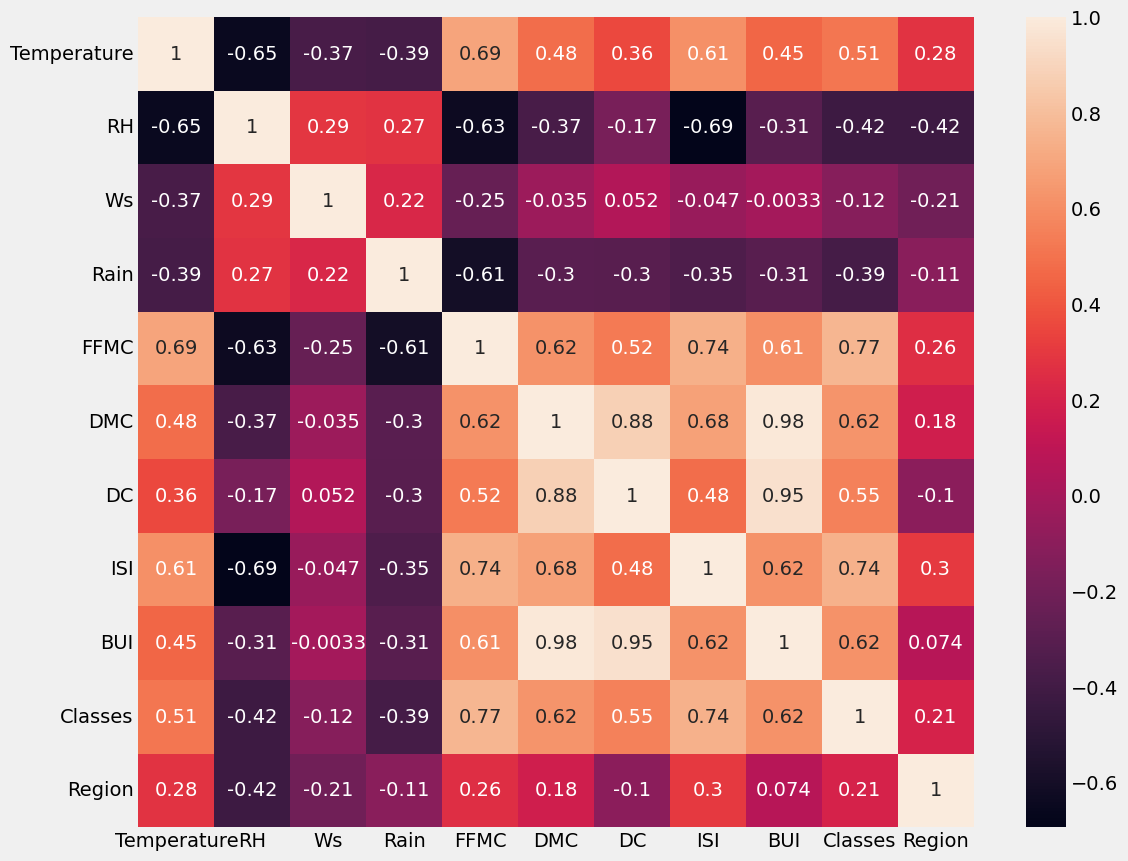

In [20]:
## Check for Multi-collinearity

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
correlation(X_train, 0.90)

{'BUI'}